In [6]:
#importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from yellowbrick.features import Rank2D
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

# Problem Statement

## Regression Analysis

An automobile company is planning to enter the US automotive market. As part of their rigorous market research, they would like to get a thorough understanding of the key factors that drive the price of cars in the US. They collected a decent amount of data about the cars that are currently on the market, recording a diverse set of attributes. Create a regression model that can predict the price of a car from a set of selected features, and also analyze how much these features can explain the variations of car prices in the US.

In [2]:
# Loading the dataset

car_df = pd.read_csv("CarPrice.csv")
car_df.head(6)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.0


# Solution

## Exploratory Data Analysis

We start off by exploring the data variables and see if there is any correlation between them by plotting the correlation matrix. It shows that the features enginesize, curbweight, horsepower, carwidth, and carlength are positively correlated with price, whereas, highwaympg and citympg are negatively correlated with price.

## Question 1

Develop a correlation matrix to check the relationship exists between each variables and price.

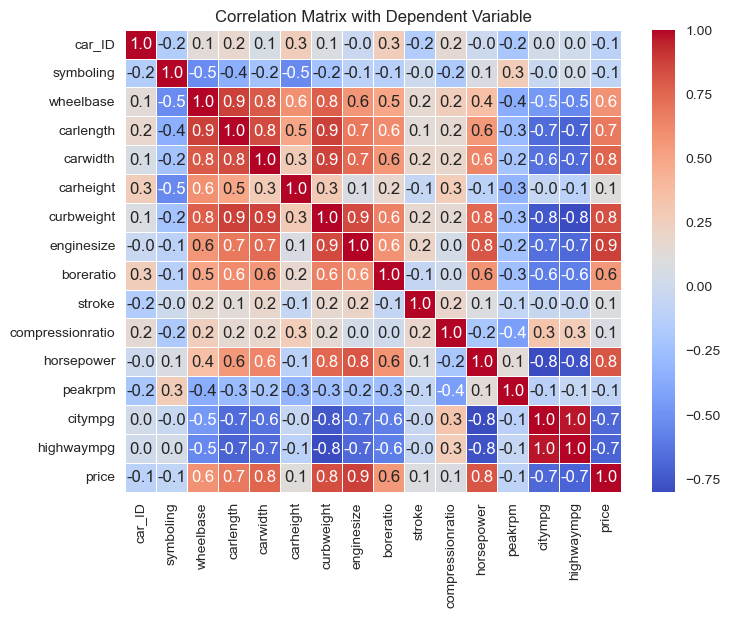

In [14]:
# Calculate the correlation matrix
correlation_matrix = car_df.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f', linewidths=0.5)
plt.title('Correlation Matrix with Dependent Variable')
plt.show()

## Modeling

The next step is to compute the individual $R^{2}$ values for the most promising features we identified from the correlation matrix. These values can be used to interpret the factors that have an influence on the price of a car. We omitted carwidth, carlength, and wheelbase because they all have a strong correlation with curbweight and it makes sense to get rid of the redundant variables. 

In [3]:
#choosing only 7 relevant features to predict car price.

newcar_df = car_df[["enginesize", "curbweight", "horsepower", "highwaympg", "citympg", "price", "CarName"]]
newcar_df.head(6)

,enginesize,curbweight,horsepower,highwaympg,citympg,price,CarName
0,130,2548,111,27,21,13495.0,alfa-romero giulia
1,130,2548,111,27,21,16500.0,alfa-romero stelvio
2,152,2823,154,26,19,16500.0,alfa-romero Quadrifoglio
3,109,2337,102,30,24,13950.0,audi 100 ls
4,136,2824,115,22,18,17450.0,audi 100ls
5,136,2507,110,25,19,15250.0,audi fox


'price'

## Question 2

Running linear regression on single variables to see which variable is the best predictor of car price. 


In [4]:
# Perform linear regression for each feature
r_squared_values = {}
for feature in newcar_df.columns[:-2]:  # Exclude the target variable 'y'
    X_feature = newcar_df[[feature]]
    y_target = newcar_df["price"]

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X_feature, y_target)

    # Make predictions
    y_pred = model.predict(X_feature)

    # Calculate R-squared
    r_squared = r2_score(y_target, y_pred)

    # Store R-squared value
    r_squared_values[feature] = r_squared

# Combine R-squared values into a DataFrame
r_squared_df = pd.DataFrame(list(r_squared_values.items()), columns=['Feature', 'R-squared'])

# Display the R-squared values
print(r_squared_df)



      Feature  R-squared
0  enginesize   0.764129
1  curbweight   0.697734
2  horsepower   0.653088
3  highwaympg   0.486644
4     citympg   0.470255


The best indicator of car price prediction is Engine size with $R^2$ approx 0.764

R-squared measures the strength of the relationship between your model and the dependent variable on a 0-100% scale. Since there appeared to be a strong relationship between engine size and price of the car, a scatter plot has used to visualize this relationship. The scatter plot shows a positive correlation between engine size and price. Also, it can be seen that the data points are closer to the regression line.

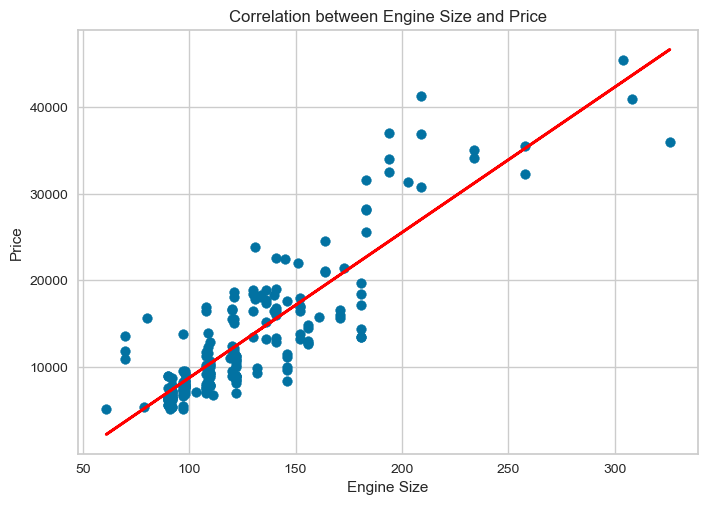

In [23]:
# Scatter plot
plt.scatter(newcar_df['enginesize'], newcar_df['price'])
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.title('Correlation between Engine Size and Price')

# Linear regression line
model1 = LinearRegression()
X = newcar_df[['enginesize']]
y = newcar_df['price']
model1.fit(X, y)

plt.plot(X, model1.predict(X), color='red', linewidth=2)

plt.show()

## Question 3

Multiple linear regression using enginesize, horsepower,curbweight, citympg, and highwaympg to estimate price.

In [8]:
# Features (independent variables)
X = newcar_df[["enginesize", "horsepower", "curbweight", "citympg", "highwaympg"]]

# Add a constant term for the intercept
X = sm.add_constant(X)

# Target variable (dependent variable)
y = newcar_df["price"]

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Display the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     174.4
Date:                Fri, 24 Nov 2023   Prob (F-statistic):           1.04e-70
Time:                        09:45:28   Log-Likelihood:                -1960.0
No. Observations:                 205   AIC:                             3932.
Df Residuals:                     199   BIC:                             3952.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.58e+04   4053.921     -3.898      0.0

Next, We develop a multiple regression equation using __enginesize, horsepower, curbweight, citympg, and highwaympg__ to estimate price, and check how well the regression model explains the variability in price compared to the individual $R^2$.


$$ price = \ 83.29x_1+51.00x_2+4.65x_3 -40.84x_4+75.94x_5-15800\ $$

where $x_1$ represents __enginesize__, $x_2$ represents __horsepower__, $x_3$ represents __curbweight__, $x_4$ represents __citympg__, $x_5$ represents __highwaympg__.

The $R^2$ value for this multiple regression model is 0.814. When a regression model accounts for more of the variance, the data points are closer to the regression line. When we used a single variable alone for the prediction the highest $R^2$ the value that we got was 0.764, whereas the multiple regression gives us better $R^2$. 


The coefficient t-value for engine size, horse power and curb weight are far away from zero, this indicates how many standard deviations the coefficient is from zero. A high absolute t-value indicates that the coefficient is likely significant. So we could easily reject the null hypothesis, that is we could declare a relationship between these variables and the price of the car. We do not have to consider the variables which have t-value closer to zero for predicting the price. Since these variables do not indicate any stronger relationship in predicting the price. From the above summary, it is clear that __enginesize, horsepower and curbweight are significant at $\alpha$ 0.001__.  


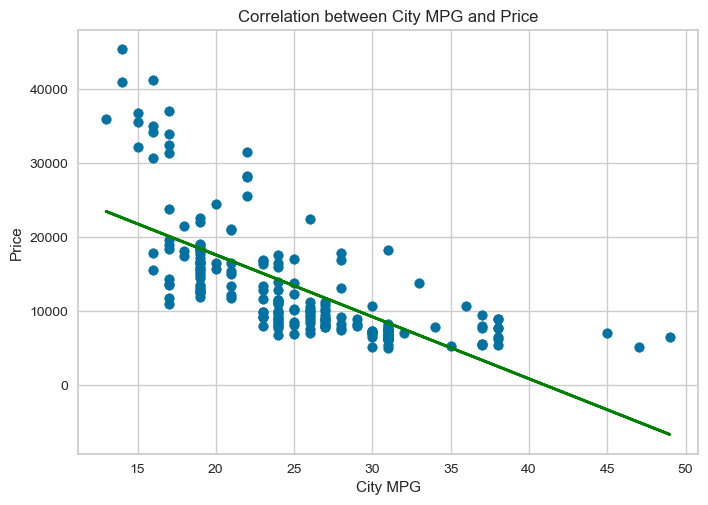

In [28]:
# Scatter plot
plt.scatter(newcar_df['citympg'], newcar_df['price'])
plt.xlabel('City MPG')
plt.ylabel('Price')
plt.title('Correlation between City MPG and Price')

# Linear regression line
model2 = LinearRegression()
X1= newcar_df[['citympg']]
y1 = newcar_df['price']
model2.fit(X1, y1)

plt.plot(X1, model2.predict(X1), color='green', linewidth=2)

plt.show()

It appears to be there is a negative correlation between city mpg and price from the correlation matrix plotted above. Furthermore, the linear model also shows that city mpg has a negative impact on the prediction of price.



To interpret this more easily, a scatter plot of price against city mpg is plotted. It appears to be there is a negative relationship between city mpg and price. Also, the observations are not fitted closer to the regression line. 

The above model gives a clearer image of which factors affect the pricing of cars. From the model, we could say that some variables are not significant for the prediction of the car price.

In order to understand the effect of citympg and highwaympg, we developed another model removing those variables and observed how $R^2$ varies.

# Question 4

After analyzing the first regression model, remove the variables that are not significant. Conduct another regression by using rest of the variables.


In [9]:
# Features (independent variables)
X1 = newcar_df[["enginesize", "horsepower", "curbweight"]]

# Add a constant term for the intercept
X1 = sm.add_constant(X1)

# Target variable (dependent variable)
y1 = newcar_df["price"]

# Fit the multiple linear regression model
model1 = sm.OLS(y1, X1).fit()

# Display the summary
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     292.9
Date:                Mon, 27 Nov 2023   Prob (F-statistic):           4.36e-73
Time:                        11:41:25   Log-Likelihood:                -1960.2
No. Observations:                 205   AIC:                             3928.
Df Residuals:                     201   BIC:                             3942.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.346e+04   1333.051    -10.100      0.0

The second model regression equation is :

$$ price = \ 84.87x_1+48.75x_2+4.26x_3-13460\ $$

where $x_1$ is the __enginesize__, $x_2$ is the __horsepower__, and $x_3$ is the __curbweight__. All these three variables are significant at $\alpha=0.001$ or 99.9% confidence level. Also, the $R^2$ value is 0.8143 which means 81.4% of the variability in car price is explained by this model. There is no difference in $R^2$   at all when comparing first and the second model.

Since there is no difference in R-squared value, It is better to use the second model for the car price prediction because it is a simpler one.

# Conclusion

From the analysis, we found out that the variables that have a major impact on the variances in car prices are enginesize, curbweight, and horsepower. The $R^2$ of the model is high, with 81.4%. This model is significant at $\alpha$ = 0.001 or 99.9% level.